 # Exercice de classification : consommation MpG
 
 Après avoir compris le fonctionnement du code sur l'exemple des iris, nous appliquons la même méthode adaptée au cas de la consommation des voitures.

In [197]:
# Import des librairies

import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import figure, subplot, hist, xlim, show, plot
%matplotlib inline

 

import pandas as pd
import pylab as pl
import numpy as np

from pandas.plotting import scatter_matrix
from pandas.plotting import boxplot
from pandas.plotting import parallel_coordinates

In [198]:
#data importand creation of panda object
data_panda = pd.read_csv('mpgTrainingSet-headings.csv')

Pour vérifier que l'import s'est effectué correctement, on affiche les noms des colonnes.

In [199]:
print(data_panda.keys())

Index(['Consumption', 'Cylinders', 'Cubic_inch', 'Horsepower', 'Weight',
       'Acceleration', 'Brand', 'Car_name'],
      dtype='object')


In [200]:
data_panda.dtypes

Consumption       int64
Cylinders         int64
Cubic_inch      float64
Horsepower      float64
Weight            int64
Acceleration    float64
Brand            object
Car_name         object
dtype: object

On affiche toutes les valeurs de consommation possibles et leur répartition.

In [201]:
data_panda['Consumption'].value_counts()

Consumption
20    85
15    73
25    64
30    58
35    37
40    11
10     8
45     6
Name: count, dtype: int64

In [202]:
data_panda.groupby('Car_name').describe()

Consumption                                                       \
                count       mean       std   min    25%   50%    75%   max   
Car_name                                                                     
100ls             2.0  22.500000  3.535534  20.0  21.25  22.5  23.75  25.0   
12                1.0  25.000000       NaN  25.0  25.00  25.0  25.00  25.0   
124               1.0  25.000000       NaN  25.0  25.00  25.0  25.00  25.0   
124_sport         1.0  25.000000       NaN  25.0  25.00  25.0  25.00  25.0   
128               1.0  25.000000       NaN  25.0  25.00  25.0  25.00  25.0   
...               ...        ...       ...   ...    ...   ...    ...   ...   
vista             1.0  10.000000       NaN  10.0  10.00  10.0  10.00  10.0   
volare            3.0  18.333333  2.886751  15.0  17.50  20.0  20.00  20.0   
woody             1.0  25.000000       NaN  25.0  25.00  25.0  25.00  25.0   
x1.9              1.0  30.000000       NaN  30.0  30.00  30.0  30.00  30.0   
zephyr            2.0  20.000000  0.000000  20.0  20.00  20.0  20.00  20.0   

          Cylinders            ...  Weight         Acceleration             \
              count      mean  ...     75%     max        count       mean   
Car_name                       ...                                           
100ls           2.0  4.000000  ...  2666.0  2694.0          2.0  14.500000   
12              1.0  4.000000  ...  2189.0  2189.0          1.0  18.000000   
124             1.0  4.000000  ...  2246.0  2246.0          1.0  14.000000   
124_sport       1.0  4.000000  ...  2265.0  2265.0          1.0  15.500000   
128             1.0  4.000000  ...  2108.0  2108.0          1.0  15.500000   
...             ...       ...  ...     ...     ...          ...        ...   
vista           1.0  8.000000  ...  4499.0  4499.0          1.0  12.500000   
volare          3.0  6.666667  ...  3785.0  3940.0          3.0  16.033333   
woody           1.0  4.000000  ...  2164.0  2164.0          1.0  22.100000   
x1.9            1.0  4.000000  ...  2000.0  2000.0          1.0  16.000000   
zephyr          2.0  6.000000  ...  3050.0  3070.0          2.0  17.450000   

                                                        
                std   min     25%    50%     75%   max  
Car_name                                                
100ls      0.707107  14.0  14.250  14.50  14.750  15.0  
12              NaN  18.0  18.000  18.00  18.000  18.0  
124             NaN  14.0  14.000  14.00  14.000  14.0  
124_sport       NaN  15.5  15.500  15.50  15.500  15.5  
128             NaN  15.5  15.500  15.50  15.500  15.5  
...             ...   ...     ...    ...     ...   ...  
vista           NaN  12.5  12.500  12.50  12.500  12.5  
volare     2.466441  13.2  15.200  17.20  17.450  17.7  
woody           NaN  22.1  22.100  22.10  22.100  22.1  
x1.9            NaN  16.0  16.000  16.00  16.000  16.0  
zephyr     1.060660  16.7  17.075  17.45  17.825  18.2  

[262 rows x 48 columns]

In [203]:
#Couleur en fonction des consommations
colors = np.where(data_panda['Consumption']>=40,'g','-')
colors[data_panda['Consumption']<40]= 'b'

colors[data_panda['Consumption']<20] = 'r'
#print(colors)
color_dict={'haute':'r','basse':'g' ,'moyenne':'b'}

## Visualisation




In [204]:
Input_cols = ['Cylinders','Horsepower','Weight','Acceleration','Brand','Car_name']

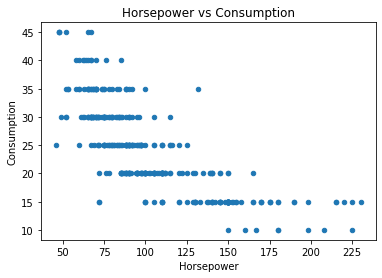

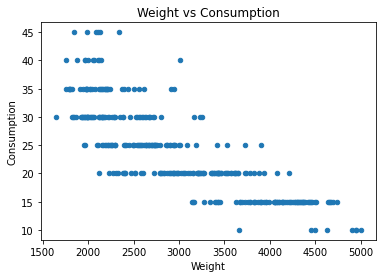

In [205]:
# on représente ainsi la longeur des pétales  en fonction de la longueur des sépales 

data_panda.plot(kind="scatter", x='Horsepower', y='Consumption')

plt.title('Horsepower vs Consumption') 
plt.show()

data_panda.plot(kind="scatter", x='Weight', y='Consumption')

plt.title('Weight vs Consumption') 
plt.show()


On crée une fonction permettant de tracer nos graphes avec trois couleurs pour les trois catégories de consommation (haute, moyenne, basse).

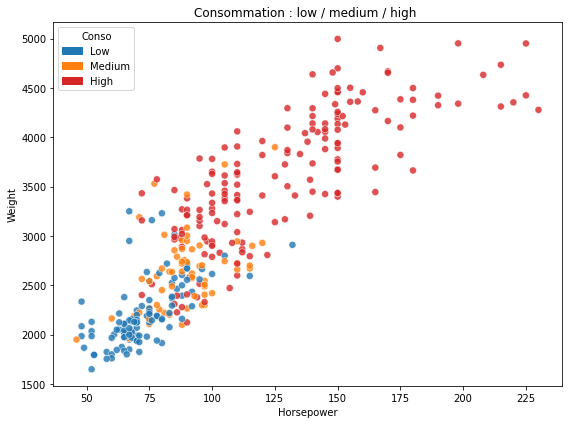

In [206]:
# ...existing code...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

def plot_with_color_groups(df, consumption_col='consumption', x_col='x', y_col='y', mode='quantile',title=''):
    # 1) définir les groupes: low / medium / high
    if mode == 'quantile':
        q1, q2 = df[consumption_col].quantile([0.33, 0.66])
        bins = [-np.inf, q1, q2, np.inf]
    else:
        # seuils fixes (exemple)
        low_thresh, high_thresh = 10, 30
        bins = [-np.inf, low_thresh, high_thresh, np.inf]

    df['conso_group'] = pd.cut(df[consumption_col], bins=bins, labels=['high', 'medium', 'low'])

    # 2) palette / color dict
    color_dict = {'low': '#1f77b4', 'medium': '#ff7f0e', 'high': '#d62728'}

    # Vérifier qu'on a bien les trois groupes (sinon ajouter un fallback)
    groups_present = df['conso_group'].astype(str).unique().tolist()
    for g in groups_present:
        if g == 'nan':
            continue
        if g not in color_dict:
            color_dict[g] = '#888888'  # fallback

    # 3) Plot: seaborn scatterplot avec palette fixe
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='conso_group', palette=color_dict, alpha=0.8, s=50)
    plt.title('Consommation : low / medium / high '+title)

    # 4) custom legend si nécessaire (conserver l'ordre low, medium, high)
    legend_handles = [Patch(color=color_dict[k], label=k.capitalize()) for k in ['low', 'medium', 'high']]
    plt.legend(handles=legend_handles, title='Conso')
    plt.tight_layout()
    plt.show()


# Exemple d'utilisation
plot_with_color_groups(data_panda, consumption_col='Consumption', x_col='Horsepower', y_col='Weight', mode='quantile')


On utilise ensuite des histogrammes pour comparer la distribution.

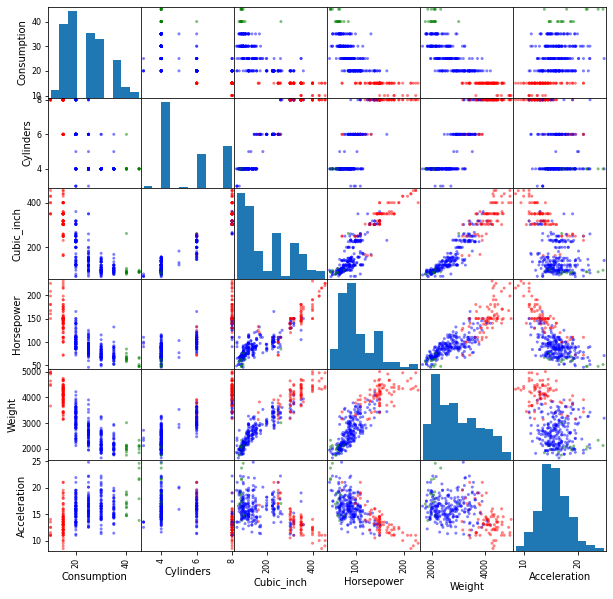

In [207]:
scatter_matrix(data_panda, figsize=(10, 10), diagonal='hist', c=colors);

Voici quelques boxplots groupés par consommation.

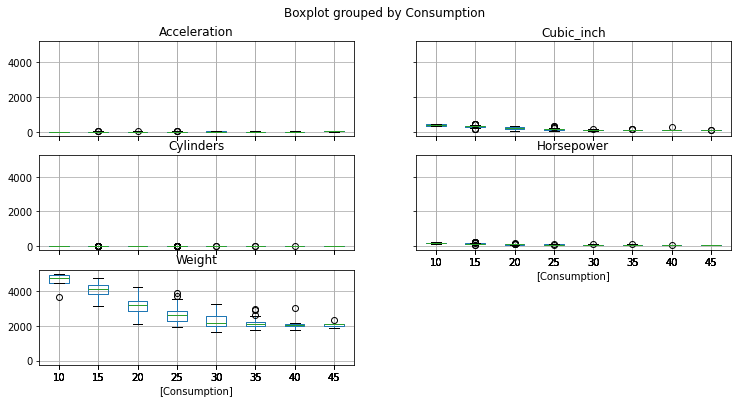

In [208]:
data_panda.boxplot(by='Consumption', figsize=(12, 6));

On observe que le seul boxplot significatif est celui du poids (weight). On observe que plus le poids est élevé, plus la consommation est grande (ie basse en mpg).

# Pré-traitement
## Normalisation

On doit travailler sur des données normalisées pour s'assurer que les distances euclidiennes ne vont pas favoriser une des caractéristiques.

In [209]:
#normalisation
import copy
Norm=copy.deepcopy(data_panda.iloc[:, :5])
Norm = Norm.apply(pd.to_numeric, downcast='integer', errors='coerce')
print(Norm)
print(Norm.dtypes)
Input_cols = ['Cylinders','Horsepower','Weight','Acceleration']
Norm[Input_cols]=(data_panda[Input_cols]-data_panda[Input_cols].min())/(data_panda[Input_cols].max()-data_panda[Input_cols].min())
print(Norm.keys())

    #transformation des espèces en numéro de classe
Norm.Consumption=Norm.Consumption.astype('category')
Norm['Consumption_encoded'],dict_cat=Norm.Consumption.factorize()
  # le dictionnaire d encodage est stocké dans le vecteur dict_cat
print(dict_cat)

     Consumption  Cylinders  Cubic_inch  Horsepower  Weight
0             35          4          79          58    1825
1             25          4          96          69    2189
2             25          4          98          90    2265
3             25          4         116          75    2246
4             30          4          68          49    1867
..           ...        ...         ...         ...     ...
337           30          4          79          67    2000
338           20          6         200          85    3070
339           20          6         200          85    2990
340           25          4         108          93    2391
341           30          4          97          67    2065

[342 rows x 5 columns]
Consumption     int8
Cylinders       int8
Cubic_inch     int16
Horsepower     int16
Weight         int16
dtype: object
Index(['Consumption', 'Cylinders', 'Cubic_inch', 'Horsepower', 'Weight',
       'Acceleration'],
      dtype='object')
CategoricalIndex([

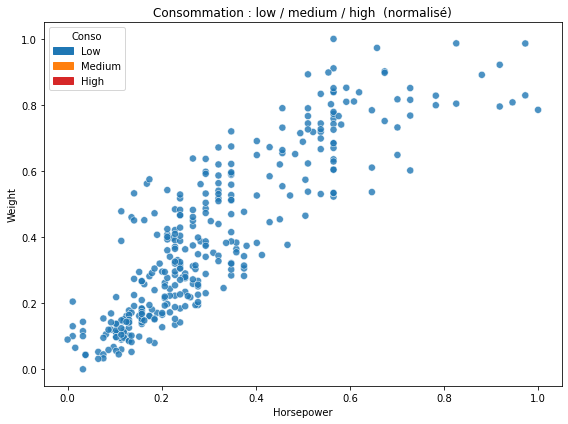

In [210]:
plot_with_color_groups(Norm, consumption_col='Consumption', x_col='Horsepower', y_col='Weight', mode='quantile', title=' (normalisé)')


On affiche ci-dessus le graphe du poids en fonction du horsepower, classé selon la consommation (toujours trois couleurs pour les trois catégories : haute, moyenne, basse) pour les données normalisées.

En comparant au graphe précédent, on observe la même répartition des points avec cette fois une échelle normalisée pour le poids et le horsepower.

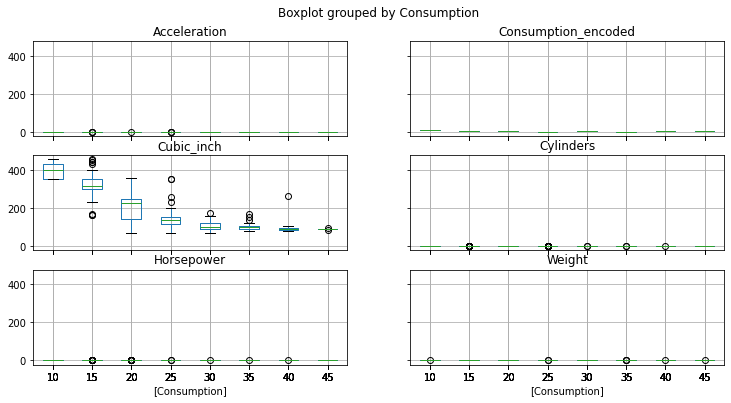

In [211]:
Norm.boxplot(by='Consumption', figsize=(12, 6));

Avec les données normalisées, les boxplots sont plus lisibles. On constate toujours que la consommation augmente avec le poids. 

On observe aussi maintenant que la consommation augmente avec le horsepower et le cubbic_inch. Elle diminue cependant avec l'accélération. Il est moins facile de tirer des conclusions avec le nombre de cylindres.

## Principal component analysis (PCA)


On détermine l'information perdue avec le PCA.

In [212]:
from sklearn.decomposition import PCA
for i in range(1,5):

    pca = PCA(n_components=i)

    pca.fit(Norm[Input_cols])

    print (i, 'components represent a data loss of' ,(1-sum(pca.explained_variance_ratio_)) * 100,'%')


1 components represent a data loss of 14.675151014275368 %
2 components represent a data loss of 5.0277054975713 %
3 components represent a data loss of 0.9770264534405437 %
4 components represent a data loss of 0.0 %


On utilise la représentation 2D.

In [213]:
n_components=2
pca = PCA(n_components)
pca.fit(Norm[Input_cols])
pca_apply = pca.transform(Norm[Input_cols])

On identifie la composition des 2 composants à partir des 4 dimensions initiales.

In [214]:
base=pd.DataFrame(pca.components_,columns=Norm[Input_cols].columns,index = ['PCA0','PCA1'])            
print(base)

      Cylinders  Horsepower    Weight  Acceleration
PCA0   0.727198    0.405061  0.515511     -0.203366
PCA1   0.240941   -0.332453  0.265470      0.872323


In [215]:
pcad_panda=pd.DataFrame(pca_apply, columns=['PCA%i' % i for i in range(n_components)]) #save in a panda object
Norm=pd.concat([Norm, pcad_panda], axis=1)#concatenate in norm_pd
print(Norm.keys())

Index(['Consumption', 'Cylinders', 'Cubic_inch', 'Horsepower', 'Weight',
       'Acceleration', 'Consumption_encoded', 'conso_group', 'PCA0', 'PCA1'],
      dtype='object')


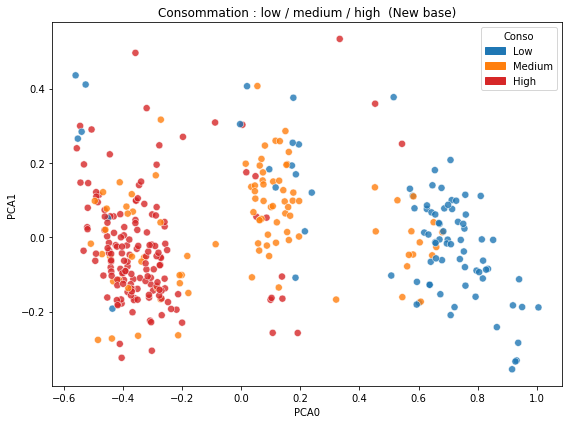

In [216]:
#visualization
plot_with_color_groups(Norm, consumption_col='Consumption_encoded', x_col='PCA0', y_col='PCA1', mode='quantile', title=' (New base)')


Le PCA identifie plutôt bien les trois classes de consommation.

## Gaussian Naive Bayes 

On sépare les données en deux groupes :
- learning set
- test set

On choisit 40% des voitures du fichier training pour construire le fichier de test. Les autres serviront à faire le learning.

In [217]:
from sklearn.model_selection import train_test_split

#Learning population is called train,
#the target value (species) t_train
#test population is called test
#the predicted value t_test

train, test, t_train, t_test = train_test_split(Norm, Norm['Consumption_encoded'], test_size=0.4, random_state=0)
#print(train)
#print(test)

On peut observer la répartition des voitures entre learning et test set.

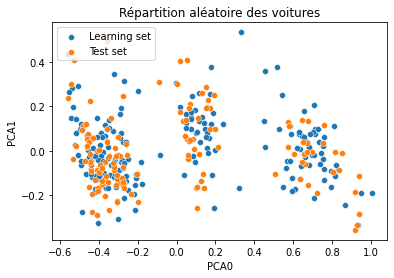

In [218]:
sns.scatterplot(x='PCA0',y='PCA1', data=train)
sns.scatterplot(x='PCA0',y='PCA1', data=test)

pl.xlabel('PCA0')
pl.ylabel('PCA1')
plt.legend( loc='upper left', labels=['Learning set', 'Test set'])
pl.title('Répartition aléatoire des voitures') 

plt.show()
    
    

Première étape - learning.

In [219]:
from sklearn.naive_bayes import GaussianNB
classifier_GNB=GaussianNB()
#Learning
classifier_GNB.fit(train[Input_cols],train['Consumption_encoded']) # train
#Prediction
prediction_train =classifier_GNB.predict(train[Input_cols]) #prediction


In [220]:
#comparaison prédiction avec réalité

for i in range (0,10):
    print('Véhicule ', i+1, ': consommation réelle = ', dict_cat[train['Consumption_encoded'].iloc[i]], ', prédiction = ', dict_cat[prediction_train[i]],'encodé : ',train['Consumption_encoded'].iloc[i])

Véhicule  1 : consommation réelle =  15 , prédiction =  15 encodé :  5
Véhicule  2 : consommation réelle =  25 , prédiction =  15 encodé :  1
Véhicule  3 : consommation réelle =  20 , prédiction =  30 encodé :  4
Véhicule  4 : consommation réelle =  25 , prédiction =  20 encodé :  1
Véhicule  5 : consommation réelle =  35 , prédiction =  30 encodé :  0
Véhicule  6 : consommation réelle =  20 , prédiction =  30 encodé :  4
Véhicule  7 : consommation réelle =  15 , prédiction =  20 encodé :  5
Véhicule  8 : consommation réelle =  20 , prédiction =  20 encodé :  4
Véhicule  9 : consommation réelle =  15 , prédiction =  10 encodé :  5
Véhicule  10 : consommation réelle =  20 , prédiction =  20 encodé :  4


On mesure la performance sur tout le train set.

In [221]:
print (classifier_GNB.score(train[Input_cols],t_train)) # test


0.34146341463414637


La performance est plutôt correcte, considérant que la prédiction de la consommation est loin d'être riviale.

In [222]:
prediction_test =classifier_GNB.predict(test[Input_cols]) #prediction
print (classifier_GNB.score(test[Input_cols],t_test)) # test

0.35036496350364965


In [223]:
prediction =classifier_GNB.predict(Norm[Input_cols]) #prediction

Ci-dessous, on affiche la matrice de confusion. Les colonnes représentent les consommations prédites et les lignes représentent les consommations réelles.

In [224]:
from sklearn.metrics import confusion_matrix
M_GNB=confusion_matrix(prediction_test,t_test)
print (M_GNB)


[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [10 24 23  4  3  0  2  0]
 [ 2  0  0  2  0  0  0  0]
 [ 0  8  2  1 20  4  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  0  0  0  4 22  0  3]]


Visualisons maintenant cette même information sous forme d'un graphe.

/tmp/ipykernel_61002/3351213611.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conf_GNB=pd.concat([conf_GNB,new_row], ignore_index=True)


<function matplotlib.pyplot.show(close=None, block=None)>

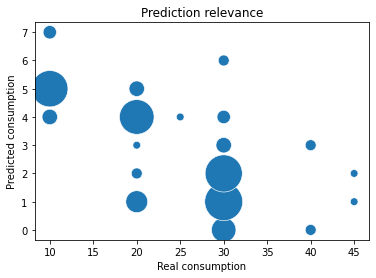

In [225]:
conf_GNB = pd.DataFrame(columns=['real','real_name','predicted','density'])
for i in range (0, 8):
    for j in range (0,8) :
        if M_GNB[i][j]>0 :
            new_row =pd.DataFrame({'real':i, 'real_name':dict_cat[i],'predicted':j, 'density':float(M_GNB[i][j])}, index=[0])
            conf_GNB=pd.concat([conf_GNB,new_row], ignore_index=True)
sns.scatterplot(x='real_name', y='predicted', s=(conf_GNB.density)*60, data=conf_GNB) 
pl.xlabel('Real consumption')
pl.ylabel('Predicted consumption')
pl.title('Prediction relevance')
show

Les erreurs sont les éléments non nuls n'appartenant pas à la diagonale de la matrice. On constate que le modèle fait plusieurs erreurs.

In [226]:
from sklearn.metrics import classification_report

print (classification_report(prediction_test,t_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.88      0.35      0.50        66
           3       0.29      0.50      0.36         4
           4       0.71      0.57      0.63        35
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       1.00      0.10      0.19        29

    accuracy                           0.35       137
   macro avg       0.36      0.19      0.21       137
weighted avg       0.83      0.35      0.45       137



/home/mathijs/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mathijs/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mathijs/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [227]:
from sklearn.model_selection import cross_val_score

# cross validation with 6 iterations 
scores = cross_val_score(classifier_GNB,Norm[Input_cols], Norm['Consumption_encoded'], cv=6)

print (scores)

[0.19298246 0.28070175 0.35087719 0.29824561 0.19298246 0.40350877]


La performance varie en fonction des itérations. La prédiction de la consommation d'un vehicule étant assez compliquée, on se satisfait de tous les scores, sauf le premier de 19% qui paraît tout de même un peu faible.

In [228]:
from numpy import mean

print (mean(scores))


0.28654970760233917


Le score moyen de 33% est plutôt très satisfaisant.

## Use
On peut utiliser la classification pour tout le set.

In [229]:
prediction_test_GNB =classifier_GNB.predict(Norm[Input_cols]) #prediction
pred_GNB = pd.DataFrame(prediction_test_GNB )
pred_GNB.columns = ['Prediction_GNB']

#we merge this dataframe with df
Norm= pd.concat([Norm,pred_GNB], axis = 1)

## Réseau de neurones
Le réseau de neurones apprend sur le train set puis on l'applique à un test set pour comparer la prédiction à la valeur réelle.

In [230]:
from sklearn.neural_network import MLPClassifier
classifier_NN = MLPClassifier()
#learn
classifier_NN.fit(train[Input_cols],train['Consumption_encoded']) # learning classifier.fit(input_dat, target_data)
#use on test
prediction =classifier_NN.predict(test[Input_cols]) #prediction
#evaluate on test
print (classifier_NN.score(test[Input_cols],t_test)) # test

0.44525547445255476


/home/mathijs/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


On constate que la précision du réseau de neurones est meilleure que le GNB.

In [231]:
#application on the whole set
prediction_NN =classifier_NN.predict(Norm[Input_cols]) #prediction
pred_NN = pd.DataFrame(prediction_NN )
pred_NN.columns = ['Prediction_NN']

#we merge this dataframe with df
Norm= pd.concat([Norm,pred_NN], axis = 1)

In [232]:
M_NN=confusion_matrix(Norm['Consumption_encoded'],Norm['Prediction_NN'])
print (M_NN)

[[ 0  0 30  0  7  0  0  0]
 [ 0  0 19  0 43  2  0  0]
 [ 0  0 40  0 18  0  0  0]
 [ 0  0 10  0  1  0  0  0]
 [ 0  0  9  0 60 16  0  0]
 [ 0  0  0  0 12 61  0  0]
 [ 0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0]]


/tmp/ipykernel_61002/2363723357.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  confNN=pd.concat([confNN,new_row], ignore_index = True)


<function matplotlib.pyplot.show(close=None, block=None)>

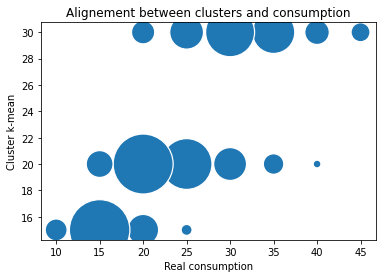

In [233]:
confNN = pd.DataFrame(columns=['real','real_consumption','predicted','predictionNN','density'])
for i in range (0, 8):
    for j in range (0,8) :
        if M_NN[i][j]>0 :
            new_row = pd.DataFrame({'real':i, 'real_consumption':dict_cat[i],'predicted':j,'predicted_cluster':dict_cat[j], 'density':float(M_NN[i][j])}, index=[0])
            confNN=pd.concat([confNN,new_row], ignore_index = True)             
sns.scatterplot(x='real_consumption', y='predicted_cluster', s=(confNN.density)*60, data=confNN) 
pl.xlabel('Real consumption')
pl.ylabel('Cluster k-mean')
pl.title('Alignement between clusters and consumption')
show

## Clustering

On utilise la méthode des k-mean.

In [234]:
print(Norm[Input_cols])

     Cylinders  Horsepower    Weight  Acceleration
0          0.2    0.065217  0.052569      0.619632
1          0.2    0.125000  0.161290      0.582822
2          0.2    0.239130  0.183990      0.429448
3          0.2    0.157609  0.178315      0.337423
4          0.2    0.016304  0.065114      0.674847
..         ...         ...       ...           ...
337        0.2    0.114130  0.104839      0.460123
338        0.6    0.211957  0.424432      0.503067
339        0.6    0.211957  0.400538      0.595092
340        0.2    0.255435  0.221625      0.429448
341        0.2    0.114130  0.124253      0.570552

[342 rows x 4 columns]


In [235]:
Norm.dtypes

Consumption            category
Cylinders               float64
Cubic_inch                int16
Horsepower              float64
Weight                  float64
Acceleration            float64
Consumption_encoded       int64
conso_group            category
PCA0                    float64
PCA1                    float64
Prediction_GNB            int64
Prediction_NN             int64
dtype: object

In [236]:
from sklearn import cluster
from sklearn.cluster import KMeans 
from sklearn.metrics import completeness_score, homogeneity_score

In [237]:
Nombre_clusters=8#cluster numbers matching rhe numbers of species
kmeans = KMeans(n_clusters=Nombre_clusters, init='random',n_init='auto') # initialization 
kmeans.fit(Norm[Input_cols]) #K-means training
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
    
    
print('Coordinates of the  3 centroids')
print(centroids)


Coordinates of the  3 centroids
[[0.20434783 0.12807183 0.21030076 0.68831688]
 [0.2        0.13502756 0.12254951 0.43549641]
 [0.60434783 0.27221172 0.52214171 0.57308616]
 [0.18769231 0.2548495  0.28596177 0.41160925]
 [1.         0.53302676 0.5873541  0.23949976]
 [1.         0.79710145 0.84414291 0.17177914]
 [1.         0.52229654 0.76866403 0.35928897]
 [0.59285714 0.35500776 0.39361452 0.3694128 ]]


In [238]:
# actual prediction
y_pred = kmeans.predict(Norm[Input_cols])

print("shape of y_pred:", y_pred.shape)
print("y_pred:", y_pred[0])
Norm = Norm.drop(columns=[col for col in Norm.columns if "Prediction_kmean" in col.lower()])

print("norm :", Norm)
# On crée directement une colonne dans Norm
Norm['Prediction_kmean'] = y_pred
print(Norm.dtypes)

print(Norm)
print("prediction k-mean")
print(Norm["Prediction_kmean"])




shape of y_pred: (342,)
y_pred: 0
norm :     Consumption  Cylinders  Cubic_inch  Horsepower    Weight  Acceleration  \
0            35        0.2          79    0.065217  0.052569      0.619632   
1            25        0.2          96    0.125000  0.161290      0.582822   
2            25        0.2          98    0.239130  0.183990      0.429448   
3            25        0.2         116    0.157609  0.178315      0.337423   
4            30        0.2          68    0.016304  0.065114      0.674847   
..          ...        ...         ...         ...       ...           ...   
337          30        0.2          79    0.114130  0.104839      0.460123   
338          20        0.6         200    0.211957  0.424432      0.503067   
339          20        0.6         200    0.211957  0.400538      0.595092   
340          25        0.2         108    0.255435  0.221625      0.429448   
341          30        0.2          97    0.114130  0.124253      0.570552   

     Consumption_encod

    Consumption  Cylinders  Cubic_inch  Horsepower    Weight  Acceleration  \
0            35        0.2          79    0.065217  0.052569      0.619632   
1            25        0.2          96    0.125000  0.161290      0.582822   
2            25        0.2          98    0.239130  0.183990      0.429448   
3            25        0.2         116    0.157609  0.178315      0.337423   
4            30        0.2          68    0.016304  0.065114      0.674847   
..          ...        ...         ...         ...       ...           ...   
337          30        0.2          79    0.114130  0.104839      0.460123   
338          20        0.6         200    0.211957  0.424432      0.503067   
339          20        0.6         200    0.211957  0.400538      0.595092   
340          25        0.2         108    0.255435  0.221625      0.429448   
341          30        0.2          97    0.114130  0.124253      0.570552   

     Consumption_encoded conso_group      PCA0      PCA1  Predi

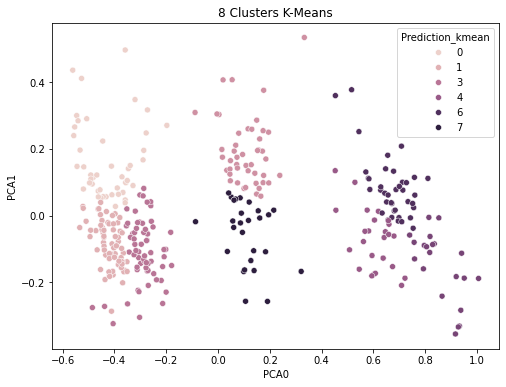

In [239]:
print(Norm)

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='PCA0', y='PCA1', hue='Prediction_kmean', data=Norm) 
pl.title('8 Clusters K-Means')
pl.show()

On peut comparer les clusters avec la réalité pour déterminer la performance de cette méthode.


In [240]:
print (completeness_score(Norm['Consumption_encoded'],Norm['Prediction_kmean']))

0.3402907011728089


Completeness is near to 1 when all elements of a class belong to the same cluster.

In [241]:
print (homogeneity_score(Norm['Consumption_encoded'],Norm['Prediction_kmean']))

0.37833267074241234


Homogeneity is near to 1 when all elements of a cluster belong to the same class.

Visualization also enables to confront clustering to reality.

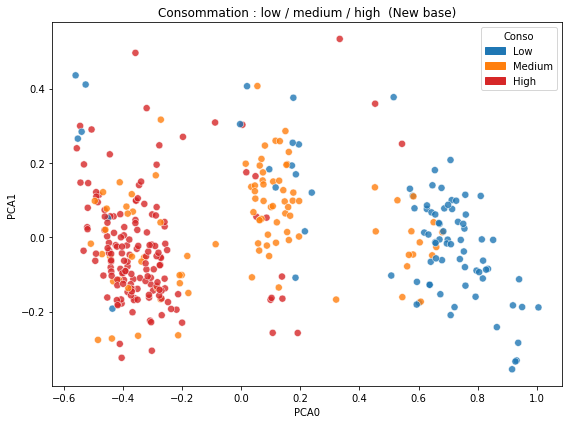

Text(0.5, 1.0, '8 Clusters K-Means')

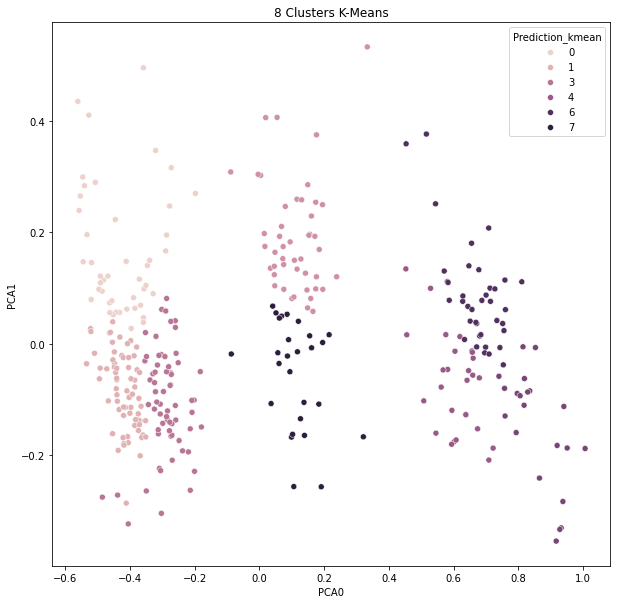

In [242]:
plot_with_color_groups(Norm, consumption_col='Consumption_encoded', x_col='PCA0', y_col='PCA1', mode='quantile', title=' (New base)')
figure = plt.figure(figsize = (10, 10))
plt.tight_layout()
sns.scatterplot(x='PCA0', y='PCA1', hue='Prediction_kmean', data=Norm) 
plt.title('8 Clusters K-Means')

In [243]:
M2=confusion_matrix(Norm['Consumption_encoded'],Norm['Prediction_kmean'])
print (M2)

[[ 7 24  0  5  0  0  0  1]
 [ 9  9  4 34  0  0  2  6]
 [15 29  1 12  0  0  0  1]
 [ 3  7  1  0  0  0  0  0]
 [ 7  1 30 14 12  0  3 18]
 [ 0  0 10  0 13 16 32  2]
 [ 5  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  5  2  0]]


/tmp/ipykernel_61002/3095097245.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conf1=pd.concat([conf1,new_row], ignore_index = True)


<function matplotlib.pyplot.show(close=None, block=None)>

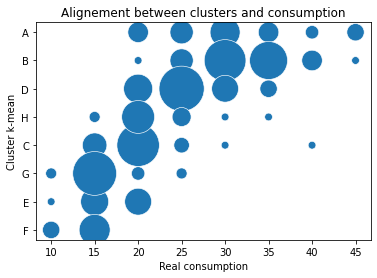

In [244]:
dict_cluster={0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H'}
conf1 = pd.DataFrame(columns=['real','real_consumption','predicted','predicted_cluster','density'])
for i in range (0, 8):
    for j in range (0,8) :
        if M2[i][j]>0 :
            new_row = pd.DataFrame({'real':i, 'real_consumption':dict_cat[i],'predicted':j,'predicted_cluster':dict_cluster[j], 'density':float(M2[i][j])}, index=[0])
            conf1=pd.concat([conf1,new_row], ignore_index = True)             
sns.scatterplot(x='real_consumption', y='predicted_cluster', s=(conf1.density)*60, data=conf1) 
pl.xlabel('Real consumption')
pl.ylabel('Cluster k-mean')
pl.title('Alignement between clusters and consumption')
show

In [245]:
print (classification_report(Norm['Consumption_encoded'],Norm['Prediction_kmean']))

              precision    recall  f1-score   support

           0       0.15      0.19      0.17        37
           1       0.13      0.14      0.13        64
           2       0.02      0.02      0.02        58
           3       0.00      0.00      0.00        11
           4       0.46      0.14      0.22        85
           5       0.76      0.22      0.34        73
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         8

    accuracy                           0.13       342
   macro avg       0.19      0.09      0.11       342
weighted avg       0.32      0.13      0.17       342



On peut associer  les clusters aux vrais labels (ici la consommation).

In [246]:
#This function find the best fit between clusters and labels
from itertools import permutations # import this into script.
#tested with python 3.6
def remap_labels(pred_labels, true_labels):
    """Rename prediction labels (clustered output) to best match true labels."""
   
    pred_labels, true_labels = np.array(pred_labels), np.array(true_labels)
    assert pred_labels.ndim == 1 == true_labels.ndim
    assert len(pred_labels) == len(true_labels)
    cluster_names = np.unique(pred_labels)
    accuracy = 0

    perms = np.array(list(permutations(np.unique(true_labels))))

    remapped_labels = true_labels
    for perm in perms:
        flipped_labels = np.zeros(len(true_labels))
        for label_index, label in enumerate(cluster_names):
            flipped_labels[pred_labels == label] = perm[label_index]

        testAcc = np.sum(flipped_labels == true_labels) / len(true_labels)
        if testAcc > accuracy:
            accuracy = testAcc
            remapped_labels = flipped_labels            
            dict_map= dict(enumerate(perm, 0))
            #print(dict_map)

    return accuracy, remapped_labels,dict_map


In [247]:
acc,y_pred,dict_map_cluster =remap_labels(Norm['Prediction_kmean'],Norm['Consumption_encoded'])
print(dict_map_cluster)
#We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['Prediction_kmean_mapped']

#we merge this dataframe with df
Norm= pd.concat([Norm,pred], axis = 1)

{0: np.int64(2), 1: np.int64(0), 2: np.int64(4), 3: np.int64(1), 4: np.int64(3), 5: np.int64(7), 6: np.int64(5), 7: np.int64(6)}


In [248]:
M_KM=confusion_matrix(Norm['Consumption_encoded'],Norm['Prediction_kmean_mapped'])
print (M_KM)

[[24  5  7  0  0  0  1  0]
 [ 9 34  9  0  4  2  6  0]
 [29 12 15  0  1  0  1  0]
 [ 7  0  3  0  1  0  0  0]
 [ 1 14  7 12 30  3 18  0]
 [ 0  0  0 13 10 32  2 16]
 [ 1  0  5  0  0  0  0  0]
 [ 0  0  0  1  0  2  0  5]]


   real real_name predicted  density
0     0        35         0     24.0
1     0        35         1      5.0
2     0        35         2      7.0
3     0        35         6      1.0
4     1        25         0      9.0
5     1        25         1     34.0
6     1        25         2      9.0
7     1        25         4      4.0
8     1        25         5      2.0
9     1        25         6      6.0
10    2        30         0     29.0
11    2        30         1     12.0
12    2        30         2     15.0
13    2        30         4      1.0
14    2        30         6      1.0
15    3        40         0      7.0
16    3        40         2      3.0
17    3        40         4      1.0
18    4        20         0      1.0
19    4        20         1     14.0
20    4        20         2      7.0
21    4        20         3     12.0
22    4        20         4     30.0
23    4        20         5      3.0
24    4        20         6     18.0
25    5        15         3     13.0
2

/tmp/ipykernel_61002/2142403627.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conf_KM=pd.concat([conf_KM,new_row], ignore_index=True)


<function matplotlib.pyplot.show(close=None, block=None)>

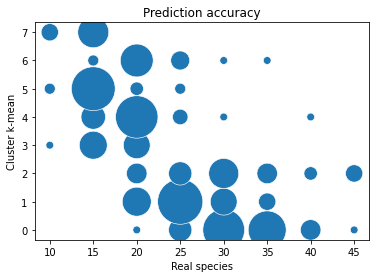

In [249]:
conf_KM = pd.DataFrame(columns=['real','real_name','predicted','density'])
for i in range (0, 8):
    for j in range (0,8) :
        if M_KM[i][j]>0 :
            new_row = pd.DataFrame({'real':i, 'real_name':dict_cat[i],'predicted':j, 'density':float(M_KM[i][j])}, index=[0])
            conf_KM=pd.concat([conf_KM,new_row], ignore_index=True)
            
print(conf_KM)
sns.scatterplot(x='real_name', y='predicted', s=(conf_KM.density)*60, data=conf_KM) 
pl.xlabel('Real species')
pl.ylabel('Cluster k-mean')
pl.title('Prediction accuracy')
show

# Export des résultats

In [250]:
nb_specimen=len(data_panda)

In [251]:
import csv

print(Norm)
# writing the csv file
with open('my_prediction_MPG_on_train_set.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    # writing the header
    writer.writerow(['car', 'Consumption','Prediction GNB', 'Prediction k-means','Prediction NN'])
    # writing the data

    for i in range(nb_specimen):
        writer.writerow([i, Norm.loc[i,'Consumption'],dict_cat[Norm.loc[i,'Prediction_GNB']], dict_cat[int(Norm.loc[i,'Prediction_kmean_mapped'])],dict_cat[int(Norm.loc[i,'Prediction_NN'])]])


    Consumption  Cylinders  Cubic_inch  Horsepower    Weight  Acceleration  \
0            35        0.2          79    0.065217  0.052569      0.619632   
1            25        0.2          96    0.125000  0.161290      0.582822   
2            25        0.2          98    0.239130  0.183990      0.429448   
3            25        0.2         116    0.157609  0.178315      0.337423   
4            30        0.2          68    0.016304  0.065114      0.674847   
..          ...        ...         ...         ...       ...           ...   
337          30        0.2          79    0.114130  0.104839      0.460123   
338          20        0.6         200    0.211957  0.424432      0.503067   
339          20        0.6         200    0.211957  0.400538      0.595092   
340          25        0.2         108    0.255435  0.221625      0.429448   
341          30        0.2          97    0.114130  0.124253      0.570552   

     Consumption_encoded conso_group      PCA0      PCA1  Predi

# Prédiction sur le dataset de test

In [266]:
test_set = pd.read_csv('mpgTestSet.csv')
#print(test_set)

import copy
TestNorm=copy.deepcopy(test_set.iloc[:, :5])
TestNorm = TestNorm.apply(pd.to_numeric, downcast='integer', errors='coerce')
#print(TestNorm)
#print(TestNorm.dtypes)
Input_cols = ['Cylinders','Horsepower','Weight','Acceleration']
TestNorm[Input_cols]=(test_set[Input_cols]-test_set[Input_cols].min())/(test_set[Input_cols].max()-test_set[Input_cols].min())

prediction_test_GNB =classifier_GNB.predict(TestNorm[Input_cols]) #prediction
pred_GNB = pd.DataFrame(prediction_test_GNB )
pred_GNB.columns = ['Prediction_GNB']

TestNorm= pd.concat([TestNorm,pred_GNB], axis = 1)

#print(TestNorm.head())




y_pred = kmeans.predict(TestNorm[Input_cols])

"""print("shape of y_pred:", y_pred.shape)
print("y_pred:", y_pred[0])"""
TestNorm = TestNorm.drop(columns=[col for col in TestNorm.columns if "Prediction_kmean" in col.lower()])

#print("norm :", TestNorm)
# On crée directement une colonne dans Norm
for i in range(len(y_pred)):
    #print("Before mapping: Cluster ", y_pred[i], " mapped to ", dict_map_cluster[y_pred[i]])
    y_pred[i] = dict_map_cluster[y_pred[i]]

TestNorm['Prediction_kmean'] = y_pred


"""print(TestNorm.dtypes)

print(TestNorm)
print("prediction k-mean")
print(TestNorm["Prediction_kmean"])"""

"""
acc,y_pred,dict_map_cluster =remap_labels(TestNorm['Prediction_kmean'],TestNorm['Consumption_encoded'])
print(dict_map_cluster)
#We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['Prediction_kmean_mapped']"""

#we merge this dataframe with df
#TestNorm= pd.concat([TestNorm,pred], axis = 1)



#application on the whole set
prediction_NN =classifier_NN.predict(TestNorm[Input_cols]) #prediction
pred_NN = pd.DataFrame(prediction_NN )
pred_NN.columns = ['Prediction_NN']

#we merge this dataframe with df
TestNorm= pd.concat([TestNorm,pred_NN], axis = 1)


import csv

# writing the csv file
with open('my_prediction_MPG_on_test_set.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    # writing the header
    writer.writerow(['car','Prediction GNB', 'Prediction k-means','Prediction NN'])
    # writing the data

    for i in range(len(y_pred)):
        writer.writerow([i,dict_cat[TestNorm.loc[i,'Prediction_GNB']], dict_cat[int(TestNorm.loc[i,'Prediction_kmean'])],dict_cat[int(TestNorm.loc[i,'Prediction_NN'])]])




# Finalisation des prédictions

In [ ]:
# predict_with_confidence.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
import os

# --- Configuration ---
TRAIN_CSV = "my_prediction_MPG_on_train_set.csv"
TEST_CSV = "my_prediction_MPG_on_test_set.csv"
OUTPUT_CSV = "final_predictions_with_confidence.csv"
PLOTS_DIR = "plots_confidence"
os.makedirs(PLOTS_DIR, exist_ok=True)

MODEL_COLS = ["Prediction GNB", "Prediction k-means", "Prediction NN"]
TRUE_COL = "Consumption"
CAR_COL = "car"

# --- Helpers ---
def estimate_error_tables(train_df, model_cols, true_col, bin_width=5):
    """
    Pour chaque modèle : on calcule l'erreur absolue moyenne conditionnée sur la valeur prédite.
    On renvoie pour chaque modèle un dictionnaire mapping valeur_prédite -> mean_abs_error.
    Pour généraliser aux valeurs non vues, on construit un KD-tree sur les valeurs prédites observées.
    """
    tables = {}
    trees = {}
    for m in model_cols:
        # regroupement par valeur prédite (arrondi dans un bin de bin_width)
        preds = train_df[m].astype(float)
        true = train_df[true_col].astype(float)
        # créer bins centrés sur multiples de bin_width
        binned = (np.round(preds / bin_width) * bin_width).astype(int)
        grouped = {}
        for val_bin, g in pd.DataFrame({m: preds, "true": true, "bin": binned}).groupby("bin"):
            errs = np.abs(g[m] - g["true"])
            grouped[int(val_bin)] = float(errs.mean())
        # fallback: global MAE si pas de bin info
        global_mae = float(np.mean(np.abs(preds - true))) if len(preds)>0 else 1.0
        # store
        tables[m] = {"by_bin": grouped, "global_mae": global_mae, "bins": np.array(sorted(grouped.keys()))}
        if len(grouped)>0:
            trees[m] = cKDTree(tables[m]["bins"].reshape(-1,1))
        else:
            trees[m] = None
    return tables, trees

def predicted_expected_error(model_name, pred_value, tables, trees, bin_width=5, max_dist_for_bin=20):
    """
    Estime l'erreur attendue pour une prédiction donnée :
    - on cherche le bin le plus proche observé dans le train set ;
    - si absent ou trop éloigné, on retourne la global_mae.
    """
    info = tables[model_name]
    if trees[model_name] is None or len(info["bins"])==0:
        return info["global_mae"]
    query = np.array([ [int(np.round(pred_value/bin_width)*bin_width)] ])
    dist, idx = trees[model_name].query(query)
    nearest_bin = int(info["bins"][idx])
    if float(dist) <= max_dist_for_bin:
        return info["by_bin"].get(nearest_bin, info["global_mae"])
    else:
        return info["global_mae"]

def error_to_confidence(expected_error, scale=1.0):
    """
    Convertit une erreur attendue en 'confiance' (entre 0 et 1).
    Formule simple : confidence = 1 / (1 + expected_error / scale)
    - scale ajuste la sensibilité ; on peut utiliser scale = median MAE sur tous modèles.
    """
    return 1.0 / (1.0 + expected_error / (scale + 1e-9))

# --- Pipeline principal ---
def compute_final_predictions(df_train, df_test, model_cols, true_col, car_col):
    # 1) Estimer tables d'erreur à partir du train set
    tables, trees = estimate_error_tables(df_train, model_cols, true_col, bin_width=5)
    # calculer scale par défaut : médiane des global_mae
    global_maes = [tables[m]["global_mae"] for m in model_cols]
    if len(global_maes)>0:
        scale = float(np.median(global_maes))
    else:
        scale = 1.0

    # 2) Pour chaque échantillon test, estimer la confiance par modèle
    results = []
    for _, row in df_test.iterrows():
        car_id = row[car_col]
        preds = [float(row[m]) for m in model_cols]
        model_confs = []
        model_expected_errors = []
        for m, p in zip(model_cols, preds):
            exp_err = predicted_expected_error(m, p, tables, trees, bin_width=5, max_dist_for_bin=20)
            conf = error_to_confidence(exp_err, scale=scale)
            model_expected_errors.append(exp_err)
            model_confs.append(conf)
        model_confs = np.array(model_confs)
        # 3) Ajouter facteur de consensus : si les prédictions sont proches, augmenter confiance
        preds_arr = np.array(preds)
        pred_std = preds_arr.std()
        # heuristique : consensus_boost entre 1 (no boost) et 1.5 (fort accord)
        consensus_boost = 1.0
        if pred_std < 2.0:
            consensus_boost = 1.5
        elif pred_std < 5.0:
            consensus_boost = 1.25
        # appliquer boost aux confiances selon proximité (plus proches => plus boost)
        # facteur dépendant aussi de l'écart relatif: lower std -> higher boost
        model_confs_boosted = np.clip(model_confs * consensus_boost, 0.0, 1.0)

        # 4) normaliser en poids et faire une moyenne pondérée des prédictions
        weights = model_confs_boosted / (model_confs_boosted.sum() + 1e-12)
        final_pred = float(np.sum(weights * preds_arr))
        # 5) final confidence : combinaison de
        #    - moyenne pondérée des confiances,
        #    - et facteur 1/(1+std(preds)) pour penaliser prédictions très dispersées
        avg_conf = float(np.sum(weights * model_confs))
        dispersion_penalty = 1.0 / (1.0 + pred_std/10.0)
        final_confidence = float(np.clip(avg_conf * dispersion_penalty, 0.0, 1.0))

        # 6) on peut aussi fournir un intervalle d'incertitude approximatif
        # approx_uncertainty = weighted average of expected errors
        approx_uncertainty = float(np.sum(weights * np.array(model_expected_errors)))

        results.append({
            car_col: car_id,
            **{f"{m}": p for m,p in zip(model_cols,preds)},
            **{f"{m}_expected_err": ee for m,ee in zip(model_cols, model_expected_errors)},
            **{f"{m}_conf": c for m,c in zip(model_cols, model_confs)},
            **{f"{m}_weight": w for m,w in zip(model_cols, weights)},
            "final_prediction": final_pred,
            "final_confidence": final_confidence,
            "final_uncertainty_est": approx_uncertainty,
            "preds_std": pred_std
        })
    df_out = pd.DataFrame(results)
    return df_out, tables, scale

# --- Visualisations ---
def make_plots(df_train, df_out, tables, scale, model_cols, true_col, car_col):
    # 1) Bar plot : global MAE de chaque modèle (train)
    model_names = model_cols
    global_maes = [tables[m]["global_mae"] for m in model_names]
    plt.figure(figsize=(6,4))
    plt.bar(model_names, global_maes)
    plt.ylabel("MAE sur train (est.)")
    plt.title("Erreur absolue moyenne (MAE) estimée par modèle sur train")
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, "model_global_mae.jpg"))
    plt.close()

    # 2) Scatter true vs pred for train (chaque modèle)
    plt.figure(figsize=(8,6))
    for m in model_names:
        plt.scatter(df_train[true_col], df_train[m], label=m, alpha=0.7)
    mn = min(df_train[true_col].min(), df_train[model_names].min().min()) - 5
    mx = max(df_train[true_col].max(), df_train[model_names].max().max()) + 5
    plt.plot([mn,mx],[mn,mx], color='k', linestyle='--', linewidth=0.8)
    plt.xlabel("True Consumption")
    plt.ylabel("Predicted")
    plt.legend()
    plt.title("True vs Predictions (train set)")
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, "true_vs_preds_train.jpg"))
    plt.close()

    # 3) Test: comparaison predictions individuelles et finale
    # plot par voiture : lignes reliant prédictions modèles -> final_prediction
    plt.figure(figsize=(10,6))
    cars = df_out[car_col].astype(str).values
    x = np.arange(len(cars))
    # plot each model
    for i,m in enumerate(model_names):
        plt.scatter(x, df_out[m], label=m, marker='o',aplha=0.5+0.1*i)
    # final
    plt.scatter(x, df_out["final_prediction"], label="final (weighted)", marker='x', s=80, c='k')
    # draw lines for each car
    for xi, row in df_out.iterrows():
        yvals = [row[m] for m in model_names] + [row["final_prediction"]]
        plt.plot([xi]*len(yvals), yvals, alpha=0.2, color='gray')
    plt.xticks(x, cars, rotation=45)
    plt.ylabel("Predicted Consumption")
    plt.title("Comparaison predictions modèles et prédiction finale (test)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, "test_preds_comparison.jpg"))
    plt.close()

    # 4) Final confidence distribution
    plt.figure(figsize=(6,4))
    plt.hist(df_out["final_confidence"], bins=10)
    plt.xlabel("Final confidence")
    plt.title("Distribution des confiances finales (test)")
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, "final_confidence_hist.jpg"))
    plt.close()

    # 5) Scatter final_prediction vs final_confidence
    plt.figure(figsize=(6,4))
    plt.scatter(df_out["final_prediction"], df_out["final_confidence"])
    plt.xlabel("Final prediction")
    plt.ylabel("Final confidence")
    plt.title("Confidence vs Final prediction (test)")
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, "final_pred_vs_conf.jpg"))
    plt.close()

# --- Execution ---
def main():
    print("Chargement des fichiers...")
    df_train = pd.read_csv(TRAIN_CSV)
    df_test = pd.read_csv(TEST_CSV)

    # vérifications rapides
    required_train_cols = [CAR_COL, TRUE_COL] + MODEL_COLS
    for c in required_train_cols:
        if c not in df_train.columns:
            raise ValueError(f"Colonne attendue absente du train: '{c}'")
    required_test_cols = [CAR_COL] + MODEL_COLS
    for c in required_test_cols:
        if c not in df_test.columns:
            raise ValueError(f"Colonne attendue absente du test: '{c}'")

    df_out, tables, scale = compute_final_predictions(df_train, df_test, MODEL_COLS, TRUE_COL, CAR_COL)
    # sauver csv
    df_out.to_csv(OUTPUT_CSV, index=False)
    print(f"CSV de sortie sauvegardé -> {OUTPUT_CSV}")

    # plots
    make_plots(df_train, df_out, tables, scale, MODEL_COLS, TRUE_COL, CAR_COL)
    print(f"Plots sauvegardés dans le dossier '{PLOTS_DIR}'")

    # aperçu console
    print("\nAperçu des premières lignes du fichier de sortie :")
    print(df_out.head().to_string(index=False))

if __name__ == "__main__":
    main()


Chargement des fichiers...
CSV de sortie sauvegardé -> final_predictions_with_confidence.csv


/tmp/ipykernel_61002/1165598719.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nearest_bin = int(info["bins"][idx])
/tmp/ipykernel_61002/1165598719.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if float(dist) <= max_dist_for_bin:


Plots sauvegardés dans le dossier 'plots_confidence'

Aperçu des premières lignes du fichier de sortie :
 car  Prediction GNB  Prediction k-means  Prediction NN  Prediction GNB_expected_err  Prediction k-means_expected_err  Prediction NN_expected_err  Prediction GNB_conf  Prediction k-means_conf  Prediction NN_conf  Prediction GNB_weight  Prediction k-means_weight  Prediction NN_weight  final_prediction  final_confidence  final_uncertainty_est  preds_std
   0            10.0                10.0           15.0                     5.365854                         3.809524                    1.609195             0.441384                 0.526725            0.724875               0.260714                   0.311122              0.428164         12.140820          0.476908               3.273179   2.357023
   1            10.0                40.0           15.0                     5.365854                        22.884615                    1.609195             0.441384                 0.15

![Prédiciton finale en foncion des différents modèles](plots_confidence/test_preds_comparison.jpg)



La méthode repose sur l’idée d’estimer, pour chaque modèle, sa **fiabilité locale** en fonction de la valeur qu’il prédit. À partir du train set, on calcule donc l’erreur absolue moyenne (MAE) globale de chaque modèle, ainsi que l’erreur moyenne conditionnée sur la valeur prédite (en regroupant les prédictions dans des intervalles). Pour une nouvelle voiture du test set, on estime alors l’erreur attendue de chaque modèle en cherchant l’intervalle de prédiction le plus proche observé dans le train set. Cette erreur attendue est ensuite convertie en un score de **confiance** (plus l’erreur attendue est faible, plus la confiance est haute). Les prédictions finales sont obtenues en faisant une moyenne pondérée des sorties des modèles, les poids étant directement les confiances ajustées par un facteur de consensus (si les modèles s’accordent entre eux, leur confiance augmente). On obtient ainsi, pour chaque voiture, une prédiction finale accompagnée d’un niveau de fiabilité cohérent avec les performances observées sur le train set.
